In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Specify the File Path
file_path = '/Users/kwonheejin/Documents/DL/dataset/DailyDelhiClimateTrain.csv'

# Load File
df = pd.read_csv(file_path)

# A quick view
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.shape

(1462, 5)

In [4]:
data = df[['humidity', 'wind_speed', 'meanpressure']].values  # 'meantemp' 제외
target = df['meantemp'].values

In [5]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
target = target.reshape(-1, 1)
target = scaler.fit_transform(target)

In [6]:
sequence_length = 10  # 10일 동안의 데이터를 이미지로 표현
image_data = []
target_data = []
for i in range(len(data) - sequence_length):
    sequence = data[i:i+sequence_length]
    image_data.append(sequence)
    target_data.append(target[i+sequence_length])

image_data = np.array(image_data)
target_data = np.array(target_data)

In [7]:
image_data = image_data.reshape(-1, sequence_length, data.shape[1], 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(image_data, target_data, test_size=0.2, random_state=42)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(sequence_length, data.shape[1], 1)))
model.add(MaxPooling2D((1, 1)))
model.add(Flatten())
model.add(Dropout(0.3))  # 드롭아웃 층 추가
model.add(Dense(64, activation='relu'))  # 추가적인 덴스 층
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
19/19 [==============================] - 0s 708us/step - loss: 0.1805
Epoch 2/50
19/19 [==============================] - 0s 597us/step - loss: 0.0546
Epoch 3/50
19/19 [==============================] - 0s 579us/step - loss: 0.0355
Epoch 4/50
19/19 [==============================] - 0s 629us/step - loss: 0.0343
Epoch 5/50
19/19 [==============================] - 0s 610us/step - loss: 0.0344
Epoch 6/50
19/19 [==============================] - 0s 595us/step - loss: 0.0335
Epoch 7/50
19/19 [==============================] - 0s 617us/step - loss: 0.0326
Epoch 8/50
19/19 [==============================] - 0s 625us/step - loss: 0.0325
Epoch 9/50
19/19 [==============================] - 0s 642us/step - loss: 0.0306
Epoch 10/50
19/19 [==============================] - 0s 618us/step - loss: 0.0318
Epoch 11/50
19/19 [==============================] - 0s 636us/step - loss: 0.0306
Epoch 12/50
19/19 [==============================] - 0s 627us/step - loss: 0.0292
Epoch 13/50
19/19 [======

In [12]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"훈련 손실: {train_loss:.5f}")
print(f"테스트 손실: {test_loss:.5f}")

훈련 손실: 0.02358
테스트 손실: 0.02787


In [13]:
predicted = model.predict(X_test)

10/10 [==============================] - 0s 421us/step


In [14]:
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

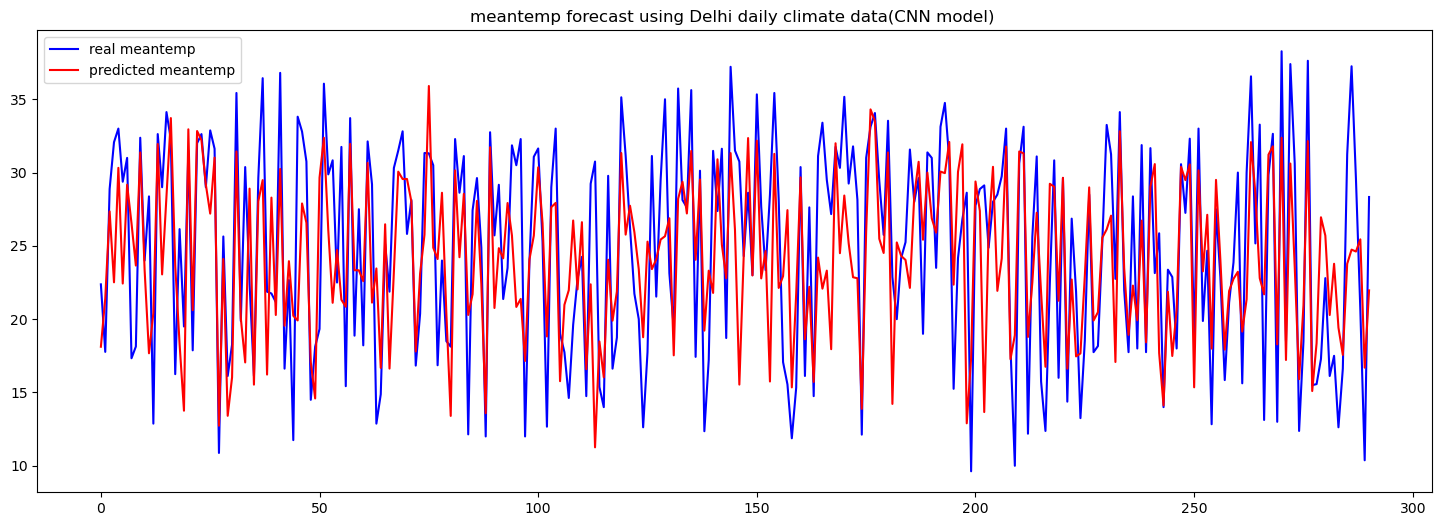

In [15]:
plt.figure(figsize=(18, 6))
plt.plot(y_test, label='real meantemp', color='blue')
plt.plot(predicted, label='predicted meantemp', color='red')
plt.title('meantemp forecast using Delhi daily climate data(CNN model) ')
plt.legend()
plt.show()